## RNN  
SimpleRNN

In [7]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.concatenate(successive_outputs, axis=0)

In [8]:
from keras import models, layers
import keras
import matplotlib.pyplot as plt

Using Theano backend.


In [9]:
model = models.Sequential()
model.add(layers.Embedding(10000, 32))
model.add(layers.SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [10]:
model = models.Sequential()
model.add(layers.Embedding(10000, 32))
model.add(layers.SimpleRNN(32,return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [11]:
def plotting_keras_acc(history):
    history = history.history
    train_acc = history['acc']
    val_acc = history['val_acc']
    train_loss = history['loss']
    val_loss = history['val_loss']
    
    epochs = np.arange(1, len(train_acc)+1)
    hr = np.arange(-1, len(train_acc)+2)
    train_loss_avg = np.repeat(np.mean(train_loss), len(hr))
    val_loss_avg = np.repeat(np.mean(val_loss), len(hr))
    train_acc_avg = np.repeat(np.mean(train_acc), len(hr))
    val_acc_avg = np.repeat(np.mean(val_acc), len(hr))
    
    fig, ax = plt.su
    plt.plot(epochs, train_loss, '.-', label='Train Loss')
    plt.plot(epochs, val_loss, '-', label='Validation Loss')
    plt.plot(hr, train_loss_avg, '--', label='Train Loss Mean')
    plt.plot(hr, val_loss_avg, '--', label='Validation Loss Mean')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.grid()
    plt.legend()
    plt.show()
    
    plt.clf()
    
    plt.plot(epochs, train_acc, '.-', label='Train Accuracy')
    plt.plot(epochs, val_acc, '-', label='Validation Accuracy')
    plt.plot(hr, train_acc_avg, '--', label='Train Loss Mean')
    plt.plot(hr, val_acc_avg, '--', label='Validation Loss Mean')
    plt.xlabel("epochs")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.legend()
    plt.show()

#### Loading data from kears

In [12]:
from keras.datasets import imdb

In [13]:
max_features = 10000
maxlen = 500
batch_size = 32

In [14]:
(train_data, train_label),(test_data, test_label) = imdb.load_data(num_words=max_features)
print(train_data.shape, train_label.shape, test_data.shape, test_label.shape)

(25000,) (25000,) (25000,) (25000,)


In [15]:
train_data[:2]

array([ list([1, 6, 131, 804, 21, 2, 284, 2021, 2831, 47, 24, 814, 18, 689, 153, 54, 29, 9, 5528, 8, 7725, 11, 6, 162, 1187, 29, 1643, 4, 4116, 3242, 7, 4, 167, 8, 2440, 90, 11, 6, 338, 4556, 3243, 11, 2, 8, 2301, 4, 157, 7, 4, 3038, 7, 6, 392, 8455, 29, 1085, 4, 1490, 1875, 2, 8304, 8167, 6810, 5, 29, 461, 3624, 19, 41, 1256, 27, 2658, 115, 1747, 8, 1277, 90, 5, 8304, 408, 6, 1365, 8, 4, 284, 21, 86, 59, 47, 6, 292, 2704, 18, 4, 2720, 7, 3377, 11, 6, 4628, 1169, 5, 4, 284, 1525, 41, 8, 30, 2848, 95, 36, 1142, 4, 2655, 295, 260, 6, 2211, 58, 10, 10, 13, 244, 6, 194, 337, 7, 2021, 2831, 5, 8167, 6810, 190, 4, 1149, 158, 5278, 42, 329, 9, 427, 1332, 14, 364, 352, 20, 127, 24, 306, 8, 28, 6, 769, 5, 9, 5067, 34, 4, 1175, 5, 2, 7, 2021, 2831, 5, 8167, 6810, 5, 165, 164, 571, 367, 2, 234, 4, 5163, 911, 1174, 9, 331, 647, 19, 4, 109, 7, 2021, 2831, 3582, 8, 27, 3390, 2, 182, 5, 979, 4, 606, 3504, 15, 36, 62, 115, 67, 257, 85, 174, 16, 29, 1595, 8, 28, 6, 119, 1586, 19, 41, 5, 2330, 27, 404, 

In [16]:
word_index = imdb.get_word_index()
print(list(word_index)[:4])

['fawn', 'tsukino', 'nunnery', 'sonja']


#### Padding the data

In [17]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, maxlen=maxlen)

train_label = np.asarray(train_label, dtype='float32')
test_label = np.asarray(test_label, dtype='float32')

#### Building the model

In [18]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
hist = model.fit(train_data, train_label,
                 epochs=10,
                 batch_size=128,
                 validation_split=0.2)

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 30s 2ms/step - loss: 0.5856 - acc: 0.6804 - val_loss: 0.4271 - val_acc: 0.8094
Epoch 2/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.3578 - acc: 0.8524 - val_loss: 0.4491 - val_acc: 0.7838
Epoch 3/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.2646 - acc: 0.8958 - val_loss: 0.5449 - val_acc: 0.7762
Epoch 4/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.2040 - acc: 0.9234 - val_loss: 0.4719 - val_acc: 0.7814
Epoch 5/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.1447 - acc: 0.9499 - val_loss: 0.4457 - val_acc: 0.8470
Epoch 6/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.0915 - acc: 0.9686 - val_loss: 0.4608 - val_acc: 0.8386
Epoch 7/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.0638 - acc: 0.9791 - val_loss: 0.5600 - val_acc:

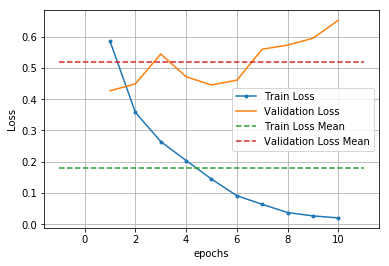

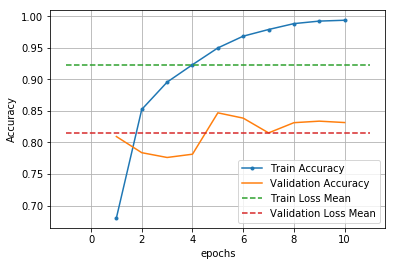

In [21]:
plotting_keras_acc(hist)

## RNN - LSTM

In [22]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
def plotting_keras_acc(history):
    history = history.history
    train_acc = history['acc']
    val_acc = history['val_acc']
    train_loss = history['loss']
    val_loss = history['val_loss']
    
    epochs = np.arange(1, len(train_acc)+1)
    hr = np.arange(-1, len(train_acc)+2)
    train_loss_avg = np.repeat(np.mean(train_loss), len(hr))
    val_loss_avg = np.repeat(np.mean(val_loss), len(hr))
    train_acc_avg = np.repeat(np.mean(train_acc), len(hr))
    val_acc_avg = np.repeat(np.mean(val_acc), len(hr))
    
    fig, ax = plt.su
    plt.plot(epochs, train_loss, '.-', label='Train Loss')
    plt.plot(epochs, val_loss, '-', label='Validation Loss')
    plt.plot(hr, train_loss_avg, '--', label='Train Loss Mean')
    plt.plot(hr, val_loss_avg, '--', label='Validation Loss Mean')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.grid()
    plt.legend()
    plt.show()
    
    plt.clf()
    
    plt.plot(epochs, train_acc, '.-', label='Train Accuracy')
    plt.plot(epochs, val_acc, '-', label='Validation Accuracy')
    plt.plot(hr, train_acc_avg, '--', label='Train Loss Mean')
    plt.plot(hr, val_acc_avg, '--', label='Validation Loss Mean')
    plt.xlabel("epochs")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.legend()
    plt.show()

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 78s 4ms/step - loss: 0.4976 - acc: 0.7640 - val_loss: 0.3386 - val_acc: 0.8680
Epoch 2/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.2936 - acc: 0.8851 - val_loss: 0.2925 - val_acc: 0.8852
Epoch 3/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.2310 - acc: 0.9145 - val_loss: 0.2913 - val_acc: 0.8836
Epoch 4/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.1986 - acc: 0.9271 - val_loss: 0.2975 - val_acc: 0.8836
Epoch 5/10
20000/20000 [==============================] - 70s 4ms/step - loss: 0.1810 - acc: 0.9338 - val_loss: 0.3440 - val_acc: 0.8754
Epoch 6/10
20000/20000 [==============================] - 71s 4ms/step - loss: 0.1548 - acc: 0.9451 - val_loss: 0.3224 - val_acc: 0.8850
Epoch 7/10
20000/20000 [==============================] - 69s 3ms/step - loss: 0.1466 - acc: 0.9484 - val_loss: 0.3669 - val_acc:

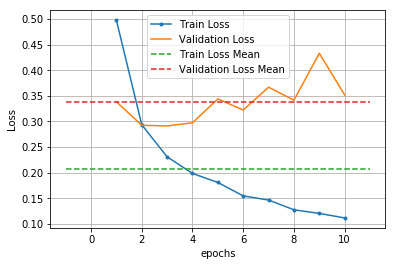

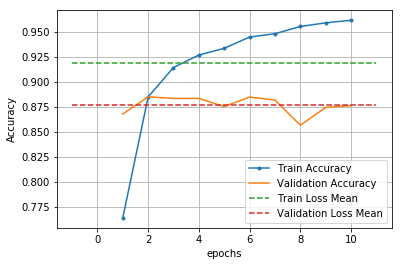

In [25]:
plotting_keras_acc(hist)

In [26]:
fig = plt.figure()